This data set allows you to study, analyze and recognize elements in the images. That’s exactly how your camera detects your face, using image recognition! It’s your turn to build and test that technique. It’s an digit recognition problem. This data set has 7000 images of 28 X 28 size, sizing 31MB.

road map 

its see the data 
try to build images 
try for hypothesis
statistical analysis
preprocessing the data
visulaization

Modeling:

In [1]:
# import the packages and data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [9]:
data = pd.read_csv('C:/Users/amogh/Downloads/train (8).csv')

In [10]:
data_test = pd.read_csv('C:/Users/amogh/Downloads/test (2).csv')

In [11]:
data.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [14]:
data.isnull().sum().head()

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
dtype: int64

In [20]:
data.shape

(42000, 785)

In [16]:
data_test.shape

(28000, 784)

In [32]:
x_train = data.iloc[:,1:]

In [33]:
y_train = data.iloc[:,0]

In [17]:
#some visualization

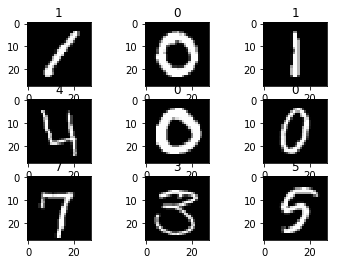

In [94]:
#fig, ax = plt.subplots(1,15,figsize = (15,10))

for i in range(0,9):
    plt.subplot(3,3,i+1)
    
    img = x_train.iloc[i].as_matrix().reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.title(y_train[i])
   
   # plt.set_title(y_train[i])

In [100]:
np.sort(y_train.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [101]:
# some statistics

In [102]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [107]:
counts = y_train.value_counts()

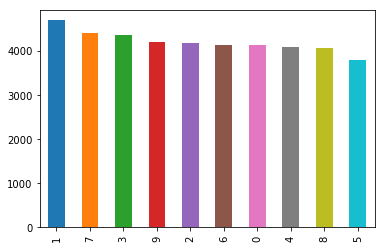

In [108]:
counts.plot(kind = 'bar')

In [110]:
# lets do modeling

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rc = RandomForestClassifier()

In [113]:
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
pred = rc.predict(data_test)

In [115]:
from sklearn.metrics import confusion_matrix

In [119]:
p = pd.DataFrame(pred)

In [124]:
p.head(10)

,0
0,2
1,0
2,9
3,9
4,3
5,7
6,0
7,3
8,0
9,3


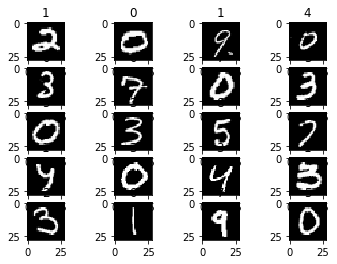

In [122]:
for i in range(0,20):
    plt.subplot(5,4,i+1)
    
    img = data_test.iloc[i].as_matrix().reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.title(y_train[i])
   

In [125]:
from scipy.misc import imread

In [ ]:
temp = []
for img_name in :
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)